In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)


In [3]:
from google.colab import files
files.upload()  # zip your test folder and upload


Saving test1.zip to test1.zip


In [22]:
!pwd
!ls


/content
sample_data  test  test1.zip


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    "test",
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

val_gen = datagen.flow_from_directory(
    "test",
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)


Found 112 images belonging to 2 classes.
Found 28 images belonging to 2 classes.


In [24]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model


In [25]:
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False


In [26]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


In [27]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [28]:
train_gen.filenames[:10]


['cats/cat_18.jpg',
 'cats/cat_190.jpg',
 'cats/cat_203.jpg',
 'cats/cat_223.jpg',
 'cats/cat_234.jpg',
 'cats/cat_244.jpg',
 'cats/cat_251.jpg',
 'cats/cat_255.jpg',
 'cats/cat_268.jpg',
 'cats/cat_279.jpg']

In [29]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 40s 7s/step - accuracy: 0.6640 - loss: 0.6833 - val_accuracy: 0.8571 - val_loss: 0.3806
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - accuracy: 0.9599 - loss: 0.1522 - val_accuracy: 0.9286 - val_loss: 0.2103
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - accuracy: 1.0000 - loss: 0.0377 - val_accuracy: 0.9286 - val_loss: 0.2057
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 1.0000 - loss: 0.0179 - val_accuracy: 0.9286 - val_loss: 0.2757
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - accuracy: 1.0000 - loss: 0.0077 - val_accuracy: 0.9286 - val_loss: 0.2975
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 0.9286 - val_loss: 0.2262
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9286 - val_loss: 0.1815
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9286 - val_loss: 0

In [30]:
base_model.trainable = True

for layer in base_model.layers[:-30]:
    layer.trainable = False


In [31]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [32]:
history_finetune = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.9068 - loss: 0.2154 - val_accuracy: 0.9286 - val_loss: 0.1600
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step - accuracy: 0.9263 - loss: 0.2021 - val_accuracy: 0.9286 - val_loss: 0.1629
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - accuracy: 0.9307 - loss: 0.1286 - val_accuracy: 0.8929 - val_loss: 0.1672
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - accuracy: 0.8785 - loss: 0.1744 - val_accuracy: 0.8929 - val_loss: 0.1706
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - accuracy: 0.9537 - loss: 0.1160 - val_accuracy: 0.8929 - val_loss: 0.1740


In [33]:
val_loss, val_acc = model.evaluate(val_gen)
val_acc


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.8929 - loss: 0.1740


0.8928571343421936

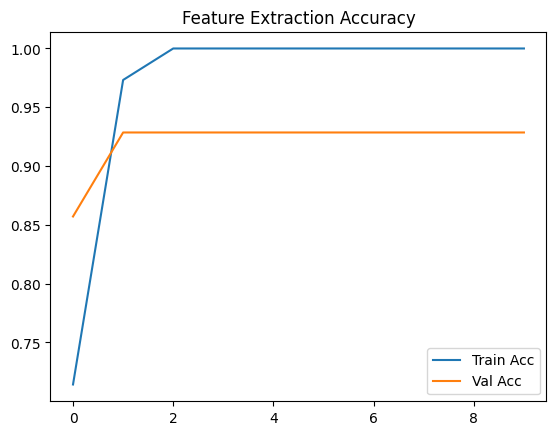

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Feature Extraction Accuracy")
plt.show()


In [35]:
model.save("image_classifier_model.h5")
